In [22]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import spacy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('data/Train.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
class_counts = data['label'].value_counts()
print("Class distribution before undersampling:")
print(class_counts)

Class distribution before undersampling:
label
0    20019
1    19981
Name: count, dtype: int64


In [9]:
under_sampler = RandomUnderSampler(sampling_strategy={0: 2000, 1: 2000}, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(data.drop('label', axis=1), data['label'])

In [10]:
df = pd.DataFrame(X_resampled, columns=data.columns[:-1])
df['label'] = y_resampled

In [11]:
df.head()

,text,label
38187,I went to see this movie with the most positiv...,0
18782,"I was not expecting a classic, but at least a ...",0
32443,"As a Mystery Science Theatre 3000 fan, I can w...",0
7255,"A couple move into their dream home, unaware t...",0
5323,Ever wonder why Pacific Islanders seem to auto...,0


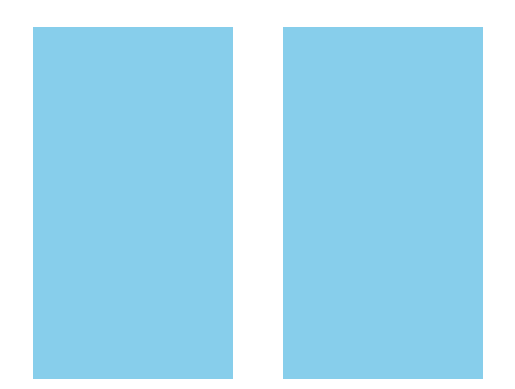

In [15]:
plt.bar(list(set(list(df.label))),list(df.label.value_counts()), color='skyblue')
plt.axis('off')
plt.show()

In [16]:
tokens = ''
for i in list(df.text):
    for j in i:
        if j not in tokens:
            tokens += j

print(tokens)

I wentoshimvpxca.dJqu'r(fg)yH,lMbLNOTGk"ABWS:-jY</>PE3D0RV!45?61298FZ*CK`z;é+U&=7$~Q%_Xóá£í´ë#à{}★ùè ü^öŻ[]úä’êÅåâñ½	\çãïÀ¤@îô°ý¨¾


In [17]:
char_to_tok = {v:k for k,v in enumerate(sorted(list(tokens), key=lambda x: ord(x)))}
char_to_tok

{'\t': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 '#': 4,
 '$': 5,
 '%': 6,
 '&': 7,
 "'": 8,
 '(': 9,
 ')': 10,
 '*': 11,
 '+': 12,
 ',': 13,
 '-': 14,
 '.': 15,
 '/': 16,
 '0': 17,
 '1': 18,
 '2': 19,
 '3': 20,
 '4': 21,
 '5': 22,
 '6': 23,
 '7': 24,
 '8': 25,
 '9': 26,
 ':': 27,
 ';': 28,
 '<': 29,
 '=': 30,
 '>': 31,
 '?': 32,
 '@': 33,
 'A': 34,
 'B': 35,
 'C': 36,
 'D': 37,
 'E': 38,
 'F': 39,
 'G': 40,
 'H': 41,
 'I': 42,
 'J': 43,
 'K': 44,
 'L': 45,
 'M': 46,
 'N': 47,
 'O': 48,
 'P': 49,
 'Q': 50,
 'R': 51,
 'S': 52,
 'T': 53,
 'U': 54,
 'V': 55,
 'W': 56,
 'X': 57,
 'Y': 58,
 'Z': 59,
 '[': 60,
 '\\': 61,
 ']': 62,
 '^': 63,
 '_': 64,
 '`': 65,
 'a': 66,
 'b': 67,
 'c': 68,
 'd': 69,
 'e': 70,
 'f': 71,
 'g': 72,
 'h': 73,
 'i': 74,
 'j': 75,
 'k': 76,
 'l': 77,
 'm': 78,
 'n': 79,
 'o': 80,
 'p': 81,
 'q': 82,
 'r': 83,
 's': 84,
 't': 85,
 'u': 86,
 'v': 87,
 'w': 88,
 'x': 89,
 'y': 90,
 'z': 91,
 '{': 92,
 '}': 93,
 '~': 94,
 '\x85': 95,
 '\x91': 96,
 '\x95': 97,
 '\x96': 98,
 '\x97

In [19]:
nlp = spacy.load('en_core_web_lg')

In [20]:
def preprocess(text):
    doc = nlp(text)
    return doc.vector
    

In [21]:
df['X'] = df.text.apply(lambda x : preprocess(x))

In [23]:
df.head()

,text,label,X
38187,I went to see this movie with the most positiv...,0,"[-1.8376613, 0.29884887, -1.6833394, -0.699948..."
18782,"I was not expecting a classic, but at least a ...",0,"[-1.3457644, 1.4977483, -2.2541654, -0.2858325..."
32443,"As a Mystery Science Theatre 3000 fan, I can w...",0,"[-1.1775298, 0.9689544, -2.0620463, -0.4013911..."
7255,"A couple move into their dream home, unaware t...",0,"[-1.8344523, 1.4829694, -1.8069572, -0.2437141..."
5323,Ever wonder why Pacific Islanders seem to auto...,0,"[-1.7335267, 1.5754964, -1.256339, -0.18415068..."


In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(
    df.X.values,
    df.label,test_size=0.3
)
xtrain

array([array([-0.31984118,  1.3093547 , -2.2531397 , -1.5356796 ,  1.9436052 ,
               1.4056321 ,  0.6272255 ,  1.4389254 , -1.6782545 , -0.04763613,
               3.490066  ,  0.62594765, -2.2208893 ,  1.32475   ,  1.6616486 ,
              -0.9804776 ,  1.9202615 , -1.4252963 , -0.62268436, -1.6469074 ,
               1.538073  , -0.58914924, -0.3733655 , -3.052208  , -1.6570722 ,
              -0.6738273 , -1.145359  , -1.4592437 , -0.09532186,  1.3243309 ,
               1.2762296 , -1.1000823 ,  0.10891556, -0.6532278 , -0.17245123,
               0.2760472 ,  0.05864777,  0.5379893 ,  3.0379465 ,  1.8775524 ,
              -0.3316028 ,  0.4945314 ,  0.5206216 , -0.9081509 , -1.3423678 ,
               1.4724171 ,  0.25913012, -3.195476  , -1.5649829 ,  1.7728622 ,
              -1.0727868 ,  0.30777588,  1.2950776 , -3.253689  , -1.3745497 ,
              -0.07875322,  0.14479478,  1.6308316 ,  0.7827118 ,  1.6066473 ,
               2.6124728 ,  0.04276631,  0.63301486,

In [25]:
X_train_2d = np.stack(xtrain)
X_test_2d = np.stack(xtest)

In [26]:
d_model = DecisionTreeClassifier()

In [27]:
d_model.fit(X_train_2d,ytrain)

DecisionTreeClassifier()

In [28]:
y_pred = d_model.predict(X_test_2d)

In [29]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.60       601
           1       0.60      0.59      0.59       599

    accuracy                           0.60      1200
   macro avg       0.60      0.60      0.60      1200
weighted avg       0.60      0.60      0.60      1200



In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

In [31]:
knn.fit(X_train_2d,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = d_model.predict(X_test_2d)

In [33]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.60       601
           1       0.60      0.59      0.59       599

    accuracy                           0.60      1200
   macro avg       0.60      0.60      0.60      1200
weighted avg       0.60      0.60      0.60      1200



In [34]:
rf = RandomForestClassifier()

In [35]:
rf.fit(X_train_2d,ytrain)

RandomForestClassifier()

In [36]:
y_pred = rf.predict(X_test_2d)

In [37]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       601
           1       0.72      0.74      0.73       599

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200



In [38]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_2d)
X_test = scaler.fit_transform(X_test_2d)

In [39]:
clf = MultinomialNB()
clf.fit(X_train,ytrain)

MultinomialNB()

In [40]:
y_pred = clf.predict(X_test)

In [41]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       601
           1       0.62      0.60      0.61       599

    accuracy                           0.62      1200
   macro avg       0.62      0.62      0.62      1200
weighted avg       0.62      0.62      0.62      1200

